In [1]:
# import necessary packages
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
from skimage.io import imread, imshow
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad

/tmp/ipykernel_1865307/2902323260.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [13]:
images = imread('01202023_S17-16194_A1_Scan1.tif')
DAPI_layer = images[0,:,:]

mask = imread('01202023_S17-16194_A1_Scan1_StarDist.tif')
mask[mask == 6800] = 0 # need to do this for StarDist because tissue thresholder is given the value of 6800
mask[mask != 0] = 1

# otsu thresholding binary image
thresh = threshold_otsu(DAPI_layer)
binary = DAPI_layer > thresh

/mnt/scratch1/miniconda3/envs/segmetric/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


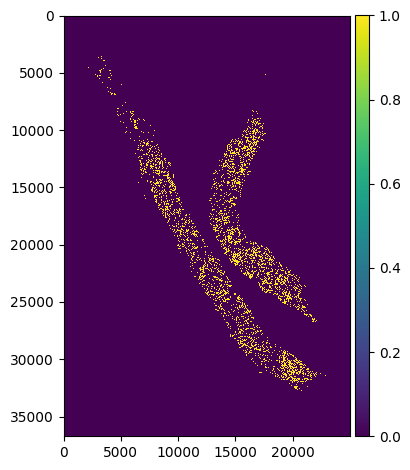

In [17]:
imshow(mask)

In [21]:
counter = 1
arr_imagecov = []
arr_maskcov = []

while counter <= 1000:
    # select a random sample
    height, width = binary.shape
    sample_size = 500
    top_left_row = np.random.randint(0, height - sample_size + 1)
    top_left_col = np.random.randint(0, width - sample_size + 1)

    sampled_square = binary[top_left_row:top_left_row + sample_size, top_left_col:top_left_col + sample_size]
    # imshow(sampled_square)

    # count number of pixels
    imagecov = np.count_nonzero(sampled_square)/(np.shape(sampled_square)[0]*np.shape(sampled_square)[1])*100

    # look at cell segmentation using overlay mask
    sampled_mask = mask[top_left_row:top_left_row + sample_size, top_left_col:top_left_col + sample_size]
    # imshow(sampled_mask)

    # count number of pixels
    maskcov = np.count_nonzero(sampled_mask)/(np.shape(sampled_mask)[0]*np.shape(sampled_mask)[1])*100

    if (imagecov > 0) or (maskcov > 0):
        arr_imagecov.append(imagecov)
        arr_maskcov.append(maskcov)
        counter = counter + 1

plt.plot(arr_imagecov, label='Image', color='blue')
plt.plot(arr_maskcov, label='Mask', color='red')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


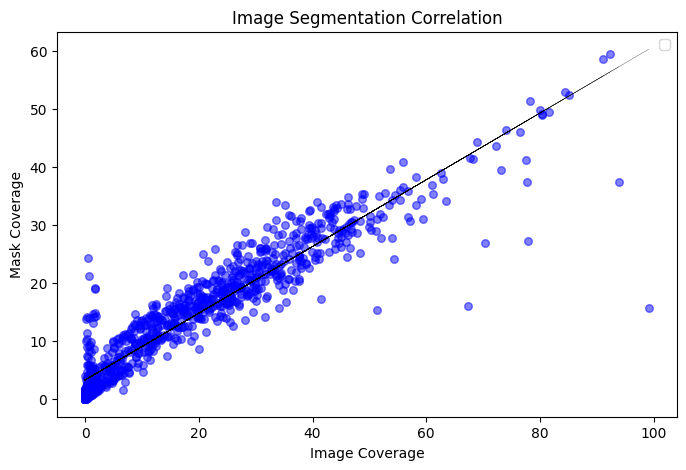

In [23]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.scatter(arr_imagecov, arr_maskcov, s=30, alpha=0.5, color='blue')
b, a = np.polyfit(arr_imagecov, arr_maskcov, deg=1)
xseq = np.linspace(0, np.maximum(arr_imagecov, arr_maskcov), num=1000)
ax.plot(xseq, a + b * xseq, color="k", lw=0.2)
plt.xlabel('Image Coverage')
plt.ylabel('Mask Coverage')
plt.title('Image Segmentation Correlation')
plt.legend()
plt.show()

In [24]:
r_squared = (np.corrcoef(arr_imagecov, arr_maskcov)[0, 1])**2
print(r_squared)

0.879520924843489
